Equation of Linear Regression is **y=b0+b1*X**

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
df=pd.DataFrame({"var1":[1,2,3,4,5],"var2":[2,4,5,4,5]})
df

,var1,var2
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [6]:
x=df[["var1"]]
y=df["var2"]

In [7]:
model=LinearRegression()
#fit
model.fit(x,y)

LinearRegression()

In [8]:
yhat=model.predict(x)
yhat

array([2.8, 3.4, 4. , 4.6, 5.2])

In [9]:
#b1
model.coef_

array([0.6])

In [10]:
#b0
model.intercept_

2.2

In [12]:
#R square
model.score(x,y)

0.6000000000000001

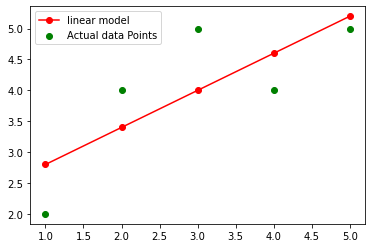

In [18]:
plt.scatter(x,y,color="g",label="Actual data Points")
plt.plot(x,yhat,color="r",marker="o",label="linear model")
plt.legend()

In [21]:
x_val=3.5
ypred=model.predict([[x_val]])
ypred

array([4.3])

In [3]:
df=pd.read_csv("../Dataset for practice/salary_data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.shape

(30, 2)

In [6]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

Text(0, 0.5, '')

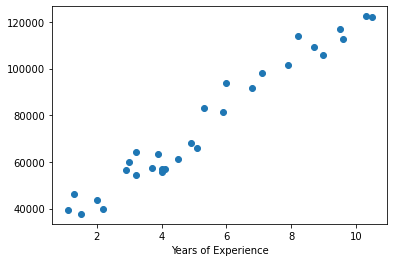

In [7]:
plt.scatter(df["YearsExperience"],df["Salary"])
plt.xlabel("Years of Experience")
plt.ylabel("")

In [8]:
x=df[["YearsExperience"]]
y=df[["Salary"]]

In [21]:
#model creation
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [22]:
#b1
model.coef_

array([[9449.96232146]])

In [23]:
#b0
model.intercept_

array([25792.20019867])

In [24]:
ypred=model.predict(x)
df["ypred"]=ypred
df

,YearsExperience,Salary,ypred
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [25]:
# R square
model.score(x,y)

0.9569566641435086

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae=mean_absolute_error(y,ypred)
mae

4644.2012894435375

In [38]:
mse=mean_squared_error(y,ypred)
mse

31270951.722280968

In [39]:
rmse=np.sqrt(mse)
rmse

5592.043608760662

In [40]:
r2_score(y,ypred)

0.9569566641435086

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [12]:
xtrain.shape

(21, 1)

In [13]:
xtest.shape

(9, 1)

In [14]:
xtrain

,YearsExperience
22,7.9
23,8.2
4,2.2
2,1.5
25,9.0
6,3.0
18,5.9
13,4.1
7,3.2
27,9.6


In [15]:
xtest,ytest

(    YearsExperience
 17              5.3
 21              7.1
 10              3.9
 19              6.0
 14              4.5
 20              6.8
 26              9.5
 3               2.0
 24              8.7,
       Salary
 17   83088.0
 21   98273.0
 10   63218.0
 19   93940.0
 14   61111.0
 20   91738.0
 26  116969.0
 3    43525.0
 24  109431.0)

In [17]:
#fit model with training data
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [31]:
ypred=model.predict(xtrain)

In [32]:
r2_score(ytrain,ypred)

0.9588099800178802

In [33]:
#testing test data
ypred=model.predict(xtest)

In [51]:
output=pd.DataFrame({"Actual":ytest,"Predicted":ypred})

ValueError: If using all scalar values, you must pass an index

In [34]:
r2_score(ytest,ypred)

0.9418670400952707

In [35]:
mse=mean_squared_error(ytest,ypred)
mse

30279726.690441683

In [36]:
mae=mean_absolute_error(ytest,ypred)
mae

4166.83736569883

In [37]:
rmse=np.sqrt(mean_absolute_error(ytest,ypred))
rmse

64.55104465226593